In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np
import csv
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
def undersample_df(X,label):
    x = X.copy()
    y = label.copy()
    df = pd.concat([x,y],axis=1)
    num_pos = df.loc[df['not_commenter']== 1].shape[0]
    num_neg = df.loc[df['not_commenter']==-1].shape[0]
    
    if num_pos<num_neg:
        df1=df.loc[df['not_commenter']==-1].sample(n=num_pos)
        df2=df.loc[df['not_commenter']== 1]
    else:
        df1=df.loc[df['not_commenter']==-1]
        df2=df.loc[df['not_commenter']== 1].sample(n=num_neg)
    
    df = pd.concat([df1,df2])
    
    y = df['not_commenter'].to_frame()
    df = df.drop(columns=['not_commenter'])
    
    return df,y

In [4]:
class LR:
    
    """
    X: an array containing the X for training and testing
    Y: an array containing the labels for training and testing
    """
    
    def __init__(self,X,Y,cv=10,test_size=0.2):
        self.X_df = X
        self.y_df = Y
        self.X = X.to_numpy()
        self.y = y.to_numpy()
        self.model = LogisticRegressionCV(cv=cv,solver='lbfgs')
        self.trainX, self.testX, self.trainy, self.testy = train_test_split(X, Y, test_size=test_size, random_state=2)
    
    def undersample(self):
        self.X_df, self.y_df = undesample_df(self.X_df, self.y_df)
        self.X = self.X_df.to_numpy()
        self.y = self.y_df.to_numpy()
    
    def train(self):
        print("Beginning trainning...")
        self.model.fit(self.trainX,self.trainy)
        self.train_acc = self.model.score(self.trainX,self.trainy)
        print("Training complete.\nAverage Score on 10-fold Cross Validation:")
        print("\t %.4f %%\n" % (self.train_acc*100))
    
    def test(self):
        print("Beginning testing...")
        self.test_score = self.model.score(self.testX,self.testy)
        print("Testing complete.\nAverage Score on 10-fold Cross Validation:")
        print("\t %.4f %%\n" % (self.test_score*100))
        
    def roc(self,filename = None):
        print("Plotting ROC Curve")
        scorey = self.model.decision_function(self.testX)
        n_classes = self.testy.shape[0]
        
        fpr, tpr, _ = roc_curve(self.testy, scorey)
        roc_auc = auc(fpr, tpr)
        
        self.fpr = fpr
        self.tpr = tpr
        self.auc = roc_auc
    
    def plot_roc(self):
        plt.figure()
        
        lw = 2
        
        plt.plot(self.fpr, self.tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % self.auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show();
    
    def save_plot(self,filename):
        plt.figure()
        lw = 2
        
        plt.plot(self.fpr, self.tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % self.auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show();
        
        if filename != None:
            print("Saving "+filename+"_ROC.png")
            plt.savefig('roc/'+filename+'.png')
            df1 = pd.DataFrame(self.fpr,columns=['FPR'])
            df2 = pd.DataFrame(self.tpr,columns=['TPR'])
            df = pd.concat([df1,df2],axis=1)
            print("Saving "+filename+"_ROC.csv")
            df.to_csv('roc_csv/'+filename+'.csv',index=False)

In [37]:
models = {}

dict_models = {0:"BaseNoCity",1:"Base",2:"BaseCampaign",3:"BaseCampaignBin",4:"BaseBow",5:"BaseBowBin"}

Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 86.2395 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 85.4914 %

Plotting ROC Curve


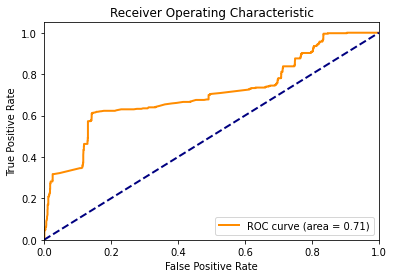

Saving 0-BaseNoCity_v3_ROC.png
Saving 0-BaseNoCity_v3_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 84.1623 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 83.6583 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

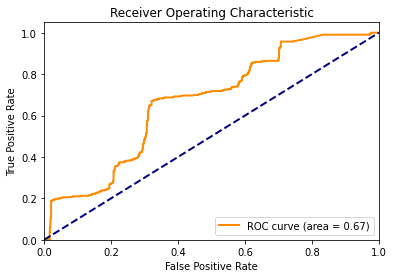

Saving 1-Base_v3_ROC.png
Saving 1-Base_v3_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 84.1623 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 83.6583 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

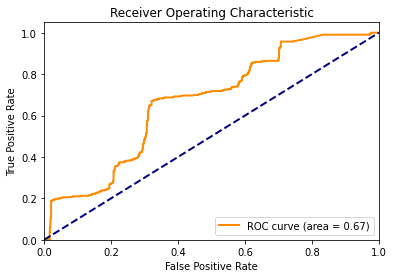

Saving 2-BaseCampaign_v3_ROC.png
Saving 2-BaseCampaign_v3_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 95.4164 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 95.7098 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

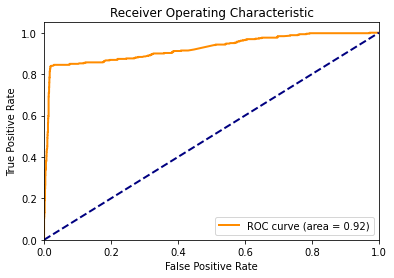

Saving 3-BaseCampaignBin_v3_ROC.png
Saving 3-BaseCampaignBin_v3_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 94.9776 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 95.0468 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

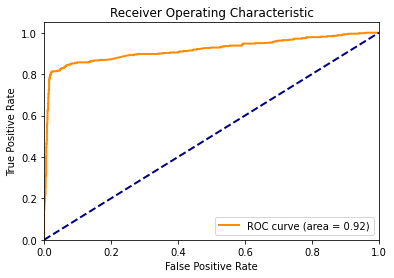

Saving 4-BaseBow_v3_ROC.png
Saving 4-BaseBow_v3_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 94.7338 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 95.2808 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

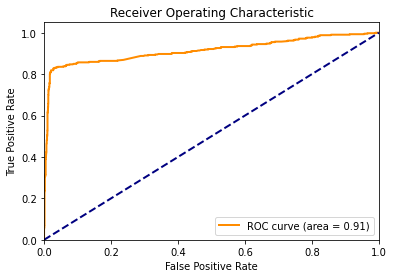

Saving 5-BaseBowBin_v3_ROC.png
Saving 5-BaseBowBin_v3_ROC.csv


<Figure size 432x288 with 0 Axes>

In [38]:
models[0] = LR(pd.read_csv('db/BaseNoCity_v0.csv'),pd.read_csv('db/Y.csv'))
models[0].train()
models[0].test()
models[0].roc()
models[0].save_plot(filename='0-BaseNoCity_v3')

models[1] = LR(pd.read_csv('db/Base_v0.csv'),pd.read_csv('db/Y.csv'))
models[1].train()
models[1].test()
models[1].roc()
models[1].save_plot(filename='1-Base_v3')
              
models[2] = LR(pd.read_csv('db/BaseCampaign_v0.csv'),pd.read_csv('db/Y.csv'))
models[2].train()
models[2].test()
models[2].roc()
models[2].save_plot(filename='2-BaseCampaign_v3')
              
models[3] = LR(pd.read_csv('db/BaseCampaignBin_v0.csv'),pd.read_csv('db/Y.csv'))
models[3].train()
models[3].test()
models[3].roc()
models[3].save_plot(filename='3-BaseCampaignBin_v3')

models[4] = LR(pd.read_csv('db/BaseBow_v0.csv'),pd.read_csv('db/Y.csv'))
models[4].train()
models[4].test()
models[4].roc()
models[4].save_plot(filename='4-BaseBow_v3')
              
models[5] = LR(pd.read_csv('db/BaseBowBin_v0.csv'),pd.read_csv('db/Y.csv'))
models[5].train()
models[5].test()
models[5].roc()
models[5].save_plot(filename='5-BaseBowBin_v3')

In [48]:
names = [dict_models[i] for i in dict_models]
cv_score = [models[m].train_acc for m in models]
test_score = [models[m].test_score for m in models]
aucs = [models[m].auc for m in models]

df_names = pd.DataFrame(names,columns=['Name'])
df_cv = pd.DataFrame(cv_score,columns=['10-fold CV'])
df_ts = pd.DataFrame(test_score,columns=['Test Score'])
df_AUCs = pd.DataFrame(aucs,columns=['AUC'])
df =pd.concat([df_names,df_cv,df_ts,df_AUCs],axis=1)
df.to_csv('results/TableResults.csv',index=False)
df_results = df

In [49]:
df_results

,Name,10-fold CV,Test Score,AUC
0,BaseNoCity,0.862395,0.854914,0.707593
1,Base,0.841623,0.836583,0.666376
2,BaseCampaign,0.841623,0.836583,0.666376
3,BaseCampaignBin,0.954164,0.957098,0.924017
4,BaseBow,0.949776,0.950468,0.917852
5,BaseBowBin,0.947338,0.952808,0.914379


Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 84.3866 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 82.7613 %

Plotting ROC Curve


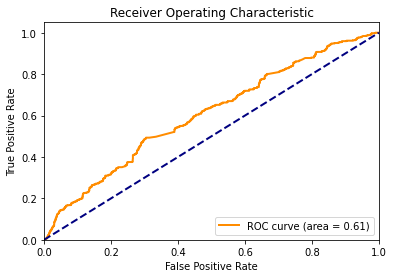

Saving 1-PCA100_ROC.png
Saving 1-PCA100_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 91.8178 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 91.2246 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

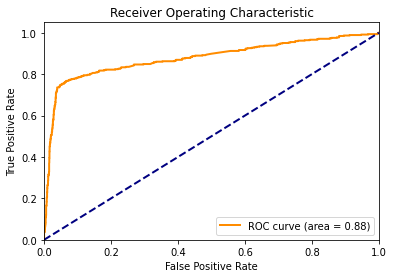

Saving 2-PCA100_ROC.png
Saving 2-PCA100_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 92.0031 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 91.3807 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

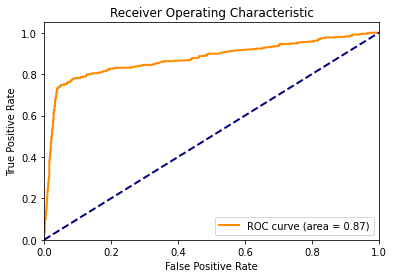

Saving 3-PCA100_ROC.png
Saving 3-PCA100_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 92.4420 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 91.9657 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

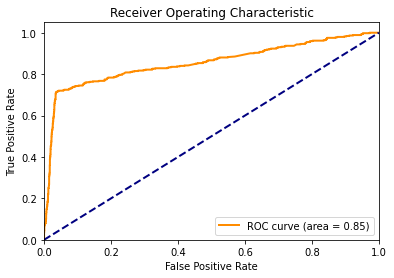

Saving 4-PCA100_ROC.png
Saving 4-PCA100_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 92.2957 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 92.5897 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

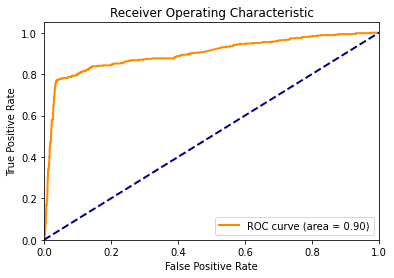

Saving 5-PCA100_ROC.png
Saving 5-PCA100_ROC.csv


<Figure size 432x288 with 0 Axes>

In [50]:
pca100_models = {}
pca_dict_models = {1:"Base",2:"BaseCampaign",3:"BaseCampaignBin",4:"BaseBow",5:"BaseBowBin"}

pca100_models[1] = LR(pd.read_csv('db/XPCA_1_100.csv'),pd.read_csv('db/yPCA_1_100.csv'))
pca100_models[1].train()
pca100_models[1].test()
pca100_models[1].roc()
pca100_models[1].save_plot(filename='1-PCA100')
              
pca100_models[2] = LR(pd.read_csv('db/XPCA_2_100.csv'),pd.read_csv('db/yPCA_2_100.csv'))
pca100_models[2].train()
pca100_models[2].test()
pca100_models[2].roc()
pca100_models[2].save_plot(filename='2-PCA100')

pca100_models[3] = LR(pd.read_csv('db/XPCA_3_100.csv'),pd.read_csv('db/yPCA_3_100.csv'))
pca100_models[3].train()
pca100_models[3].test()
pca100_models[3].roc()
pca100_models[3].save_plot(filename='3-PCA100')

pca100_models[4] = LR(pd.read_csv('db/XPCA_4_100.csv'),pd.read_csv('db/yPCA_4_100.csv'))
pca100_models[4].train()
pca100_models[4].test()
pca100_models[4].roc()
pca100_models[4].save_plot(filename='4-PCA100')

pca100_models[5] = LR(pd.read_csv('db/XPCA_5_100.csv'),pd.read_csv('db/yPCA_5_100.csv'))
pca100_models[5].train()
pca100_models[5].test()
pca100_models[5].roc()
pca100_models[5].save_plot(filename='5-PCA100')

In [64]:
names = [pca_dict_models[i] for i in pca_dict_models]
cv_score = [pca100_models[m].train_acc for m in pca100_models]
test_score = [pca100_models[m].test_score for m in pca100_models]
aucs = [pca100_models[m].auc for m in pca100_models]

df_names = pd.DataFrame(names,columns=['Name'])
df_cv = pd.DataFrame(cv_score,columns=['10-fold CV'])
df_ts = pd.DataFrame(test_score,columns=['Test Score'])
df_AUCs = pd.DataFrame(aucs,columns=['AUC'])
df =pd.concat([df_names,df_cv,df_ts,df_AUCs],axis=1)
df.index+=1
df.to_csv('results/TableResultsPCA100.csv',index=False)
df_results_pca100 = df

In [65]:
df_results_pca100

,Name,10-fold CV,Test Score,AUC
1,Base,0.843866,0.827613,0.605690
2,BaseCampaign,0.918178,0.912246,0.877801
3,BaseCampaignBin,0.920031,0.913807,0.874439
4,BaseBow,0.924420,0.919657,0.854381
5,BaseBowBin,0.922957,0.925897,0.896532


Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 84.5621 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 82.8783 %

Plotting ROC Curve


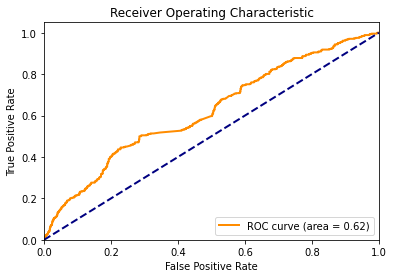

Saving 1-PCA1000_ROC.png
Saving 1-PCA1000_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 92.4030 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 89.2356 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

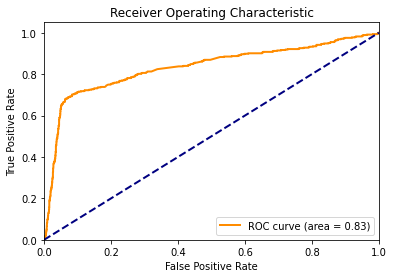

Saving 2-PCA1000_ROC.png
Saving 2-PCA1000_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 92.4712 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 89.1576 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

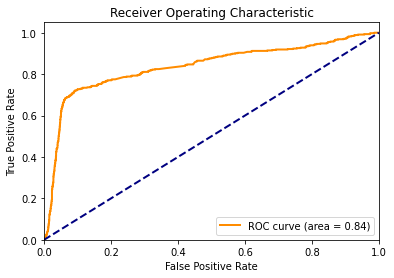

Saving 3-PCA1000_ROC.png
Saving 3-PCA1000_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 92.1884 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 90.2106 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

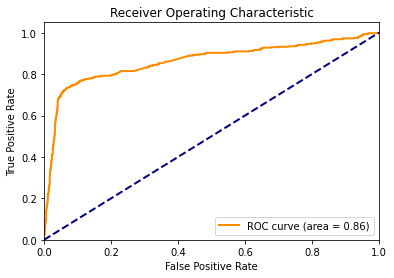

Saving 4-PCA1000_ROC.png
Saving 4-PCA1000_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 92.2177 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 89.3916 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

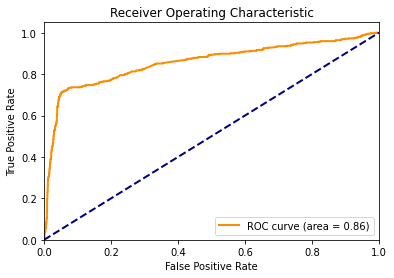

Saving 5-PCA1000_ROC.png
Saving 5-PCA1000_ROC.csv


<Figure size 432x288 with 0 Axes>

In [54]:
pca1000_models = {}
pca_dict_models = {1:"Base",2:"BaseCampaign",3:"BaseCampaignBin",4:"BaseBow",5:"BaseBowBin"}

pca1000_models[1] = LR(pd.read_csv('db/XPCA_1_1000.csv'),pd.read_csv('db/yPCA_1_1000.csv'))
pca1000_models[1].train()
pca1000_models[1].test()
pca1000_models[1].roc()
pca1000_models[1].save_plot(filename='1-PCA1000')
              
pca1000_models[2] = LR(pd.read_csv('db/XPCA_2_1000.csv'),pd.read_csv('db/yPCA_2_1000.csv'))
pca1000_models[2].train()
pca1000_models[2].test()
pca1000_models[2].roc()
pca1000_models[2].save_plot(filename='2-PCA1000')

pca1000_models[3] = LR(pd.read_csv('db/XPCA_3_1000.csv'),pd.read_csv('db/yPCA_3_1000.csv'))
pca1000_models[3].train()
pca1000_models[3].test()
pca1000_models[3].roc()
pca1000_models[3].save_plot(filename='3-PCA1000')

pca1000_models[4] = LR(pd.read_csv('db/XPCA_4_1000.csv'),pd.read_csv('db/yPCA_4_1000.csv'))
pca1000_models[4].train()
pca1000_models[4].test()
pca1000_models[4].roc()
pca1000_models[4].save_plot(filename='4-PCA1000')

pca1000_models[5] = LR(pd.read_csv('db/XPCA_5_1000.csv'),pd.read_csv('db/yPCA_5_1000.csv'))
pca1000_models[5].train()
pca1000_models[5].test()
pca1000_models[5].roc()
pca1000_models[5].save_plot(filename='5-PCA1000')

In [60]:
names = [pca_dict_models[i] for i in pca_dict_models]
cv_score = [pca1000_models[m].train_acc for m in pca1000_models]
test_score = [pca1000_models[m].test_score for m in pca1000_models]
aucs = [pca1000_models[m].auc for m in pca1000_models]

df_names = pd.DataFrame(names,columns=['Name'])
df_cv = pd.DataFrame(cv_score,columns=['10-fold CV'])
df_ts = pd.DataFrame(test_score,columns=['Test Score'])
df_AUCs = pd.DataFrame(aucs,columns=['AUC'])
df =pd.concat([df_names,df_cv,df_ts,df_AUCs],axis=1)
df.index+=1
df.to_csv('results/TableResultsPCA1000.csv',index=False)
df_results_pca1000 = df

In [61]:
df_results_pca1000

,Name,10-fold CV,Test Score,AUC
1,Base,0.845621,0.828783,0.621066
2,BaseCampaign,0.924030,0.892356,0.832818
3,BaseCampaignBin,0.924712,0.891576,0.836308
4,BaseBow,0.921884,0.902106,0.862230
5,BaseBowBin,0.922177,0.893916,0.856531


Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 86.2298 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 82.4883 %

Plotting ROC Curve


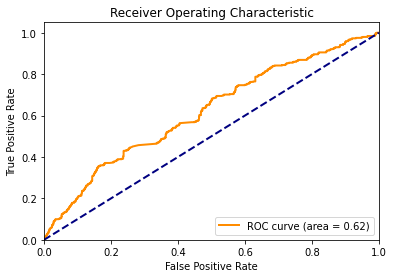

Saving 1-PCA3000_ROC.png
Saving 1-PCA3000_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 96.4502 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 91.6927 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

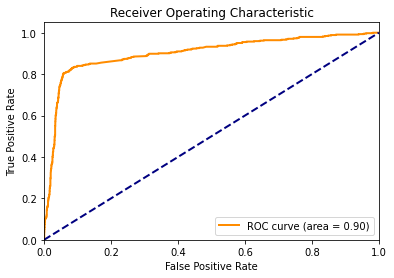

Saving 2-PCA3000_ROC.png
Saving 2-PCA3000_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 95.9235 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 92.7457 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

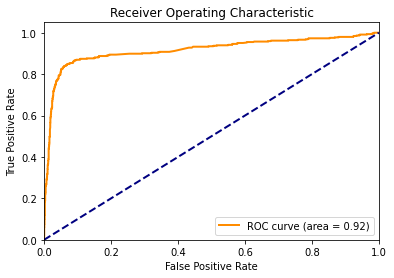

Saving 3-PCA3000_ROC.png
Saving 3-PCA3000_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 96.0601 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 94.3838 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

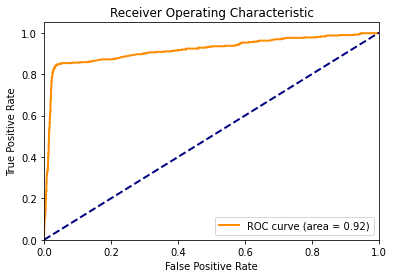

Saving 4-PCA3000_ROC.png
Saving 4-PCA3000_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 96.3526 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 93.9938 %

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

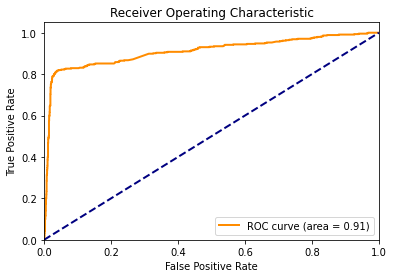

Saving 5-PCA3000_ROC.png
Saving 5-PCA3000_ROC.csv


<Figure size 432x288 with 0 Axes>

In [57]:
pca3000_models = {}
pca_dict_models = {1:"Base",2:"BaseCampaign",3:"BaseCampaignBin",4:"BaseBow",5:"BaseBowBin"}

pca3000_models[1] = LR(pd.read_csv('db/XPCA_1_3000.csv'),pd.read_csv('db/yPCA_1_3000.csv'))
pca3000_models[1].train()
pca3000_models[1].test()
pca3000_models[1].roc()
pca3000_models[1].save_plot(filename='1-PCA3000')
              
pca3000_models[2] = LR(pd.read_csv('db/XPCA_2_3000.csv'),pd.read_csv('db/yPCA_2_3000.csv'))
pca3000_models[2].train()
pca3000_models[2].test()
pca3000_models[2].roc()
pca3000_models[2].save_plot(filename='2-PCA3000')

pca3000_models[3] = LR(pd.read_csv('db/XPCA_3_3000.csv'),pd.read_csv('db/yPCA_3_3000.csv'))
pca3000_models[3].train()
pca3000_models[3].test()
pca3000_models[3].roc()
pca3000_models[3].save_plot(filename='3-PCA3000')

pca3000_models[4] = LR(pd.read_csv('db/XPCA_4_3000.csv'),pd.read_csv('db/yPCA_4_3000.csv'))
pca3000_models[4].train()
pca3000_models[4].test()
pca3000_models[4].roc()
pca3000_models[4].save_plot(filename='4-PCA3000')

pca3000_models[5] = LR(pd.read_csv('db/XPCA_5_3000.csv'),pd.read_csv('db/yPCA_5_3000.csv'))
pca3000_models[5].train()
pca3000_models[5].test()
pca3000_models[5].roc()
pca3000_models[5].save_plot(filename='5-PCA3000')

In [62]:
names = [pca_dict_models[i] for i in pca_dict_models]
cv_score = [pca3000_models[m].train_acc for m in pca3000_models]
test_score = [pca3000_models[m].test_score for m in pca3000_models]
aucs = [pca3000_models[m].auc for m in pca3000_models]

df_names = pd.DataFrame(names,columns=['Name'])
df_cv = pd.DataFrame(cv_score,columns=['10-fold CV'])
df_ts = pd.DataFrame(test_score,columns=['Test Score'])
df_AUCs = pd.DataFrame(aucs,columns=['AUC'])
df =pd.concat([df_names,df_cv,df_ts,df_AUCs],axis=1)
df.index+=1
df.to_csv('results/TableResultsPCA3000.csv',index=False)
df_results_pca3000 = df

In [63]:
df_results_pca3000

,Name,10-fold CV,Test Score,AUC
1,Base,0.862298,0.824883,0.619100
2,BaseCampaign,0.964502,0.916927,0.901210
3,BaseCampaignBin,0.959235,0.927457,0.915590
4,BaseBow,0.960601,0.943838,0.917811
5,BaseBowBin,0.963526,0.939938,0.909892
